In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.despine()

In [2]:
video_games = pd.read_csv ("vgsales.csv", header = 0, index_col = 0,)

In [3]:
video_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,29.01,3.77,8.48,82.62
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.70,12.90,3.80,3.32,35.72
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.98,3.29,2.99,32.86
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# When I previewed the csv I noticed that there seemed to be some erroneous year data, so to check I ran this:
year_data = video_games['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


In [5]:
#Lets get more information on that game
max_entry = year_data.idxmax()
max_entry = video_games.iloc[max_entry]
pd.DataFrame(max_entry).T

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6085,6087,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0,0,0.02,0.29


In [6]:
#I looked up that games information online to get the actual published year which was 2009

video_games['Year'] = video_games['Year'].replace(2020.0, 2009.0)
print("Max Year Value: ", year_data.max())
#looks like we have that sorted

Max Year Value:  2017.0


In [7]:
#lets see what we have to work with: 
print("Number of games: ", len(video_games))
publishers = video_games['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = video_games['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = video_games['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16998
Number of publishers:  593
Number of platforms:  32
Number of genres:  12


In [8]:
#Lets drop the na values
print(video_games.isnull().sum())
video_games = video_games.dropna()

Rank              0
Name              0
Platform          0
Year            268
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


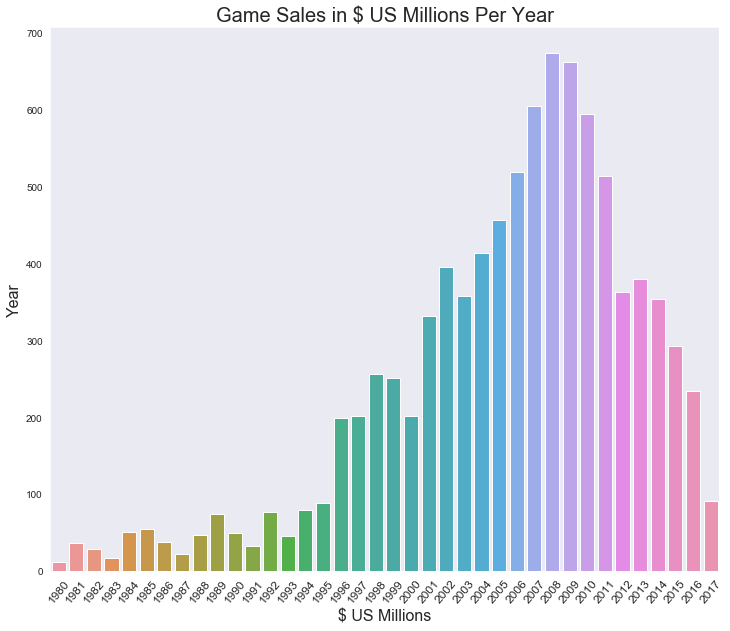

In [9]:
#Let's look at total sales per year plots out.
y = video_games.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)
sns.set_palette("colorblind")
plt.figure(figsize=(12,10))
ax = sns.barplot(y = y, x = x)

ax.set_xlabel(xlabel='$ US Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ US Millions Per Year', fontsize=20)
plt.show()

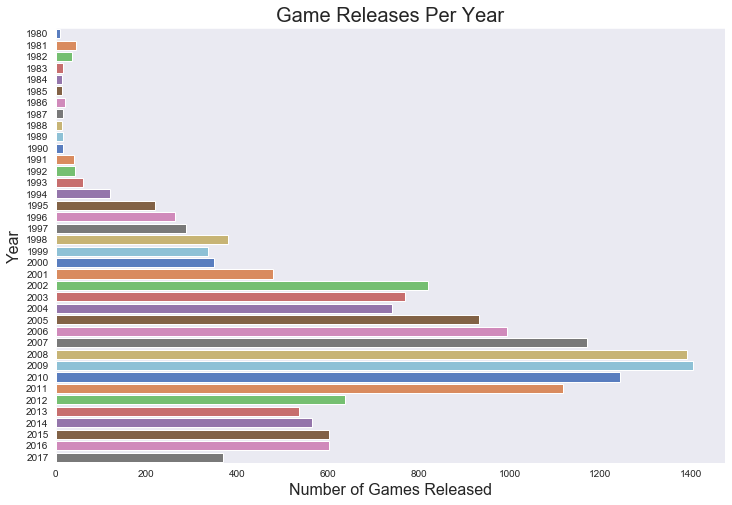

In [10]:
#How many games were released each year?

x = video_games.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
r = sns.barplot(y = y, x = x, orient='h', palette=colors)
r.set_xlabel(xlabel='Number of Games Released', fontsize=16)
r.set_ylabel(ylabel='Year', fontsize=16)
r.set_title(label='Game Releases Per Year', fontsize=20)
plt.show()

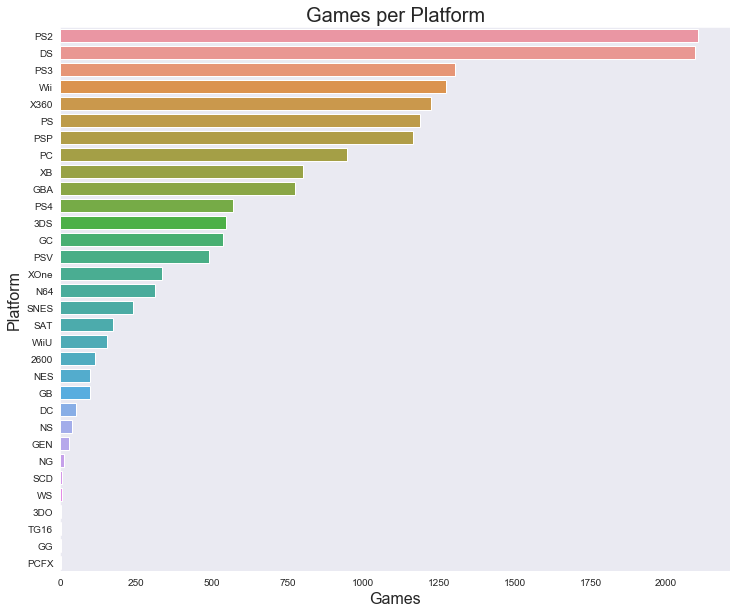

In [11]:
#Which Platforms have the most games available?
Platform_Genre = pd.crosstab(video_games.Platform,video_games.Genre)
Platform_GenreTotal = Platform_Genre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(12,10))
PG = sns.barplot(y = Platform_GenreTotal.index, x = Platform_GenreTotal.values, orient='h')
PG.set_ylabel(ylabel="Platform", fontsize=16)
PG.set_xlabel(xlabel = "Games", fontsize=16)
PG.set_title(label='Games per Platform', fontsize=20)
plt.show()

In [12]:
Platform_Genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,195,42,14,61,31,21,10,96,6,31,25,16
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,328,232,36,381,89,233,66,192,42,277,143,77
GB,6,5,0,8,18,15,2,21,1,5,9,7
GBA,160,36,22,85,136,38,63,72,40,18,86,18
GC,98,19,42,35,73,10,60,25,46,12,106,11
GEN,3,2,5,1,7,0,1,3,1,0,3,1


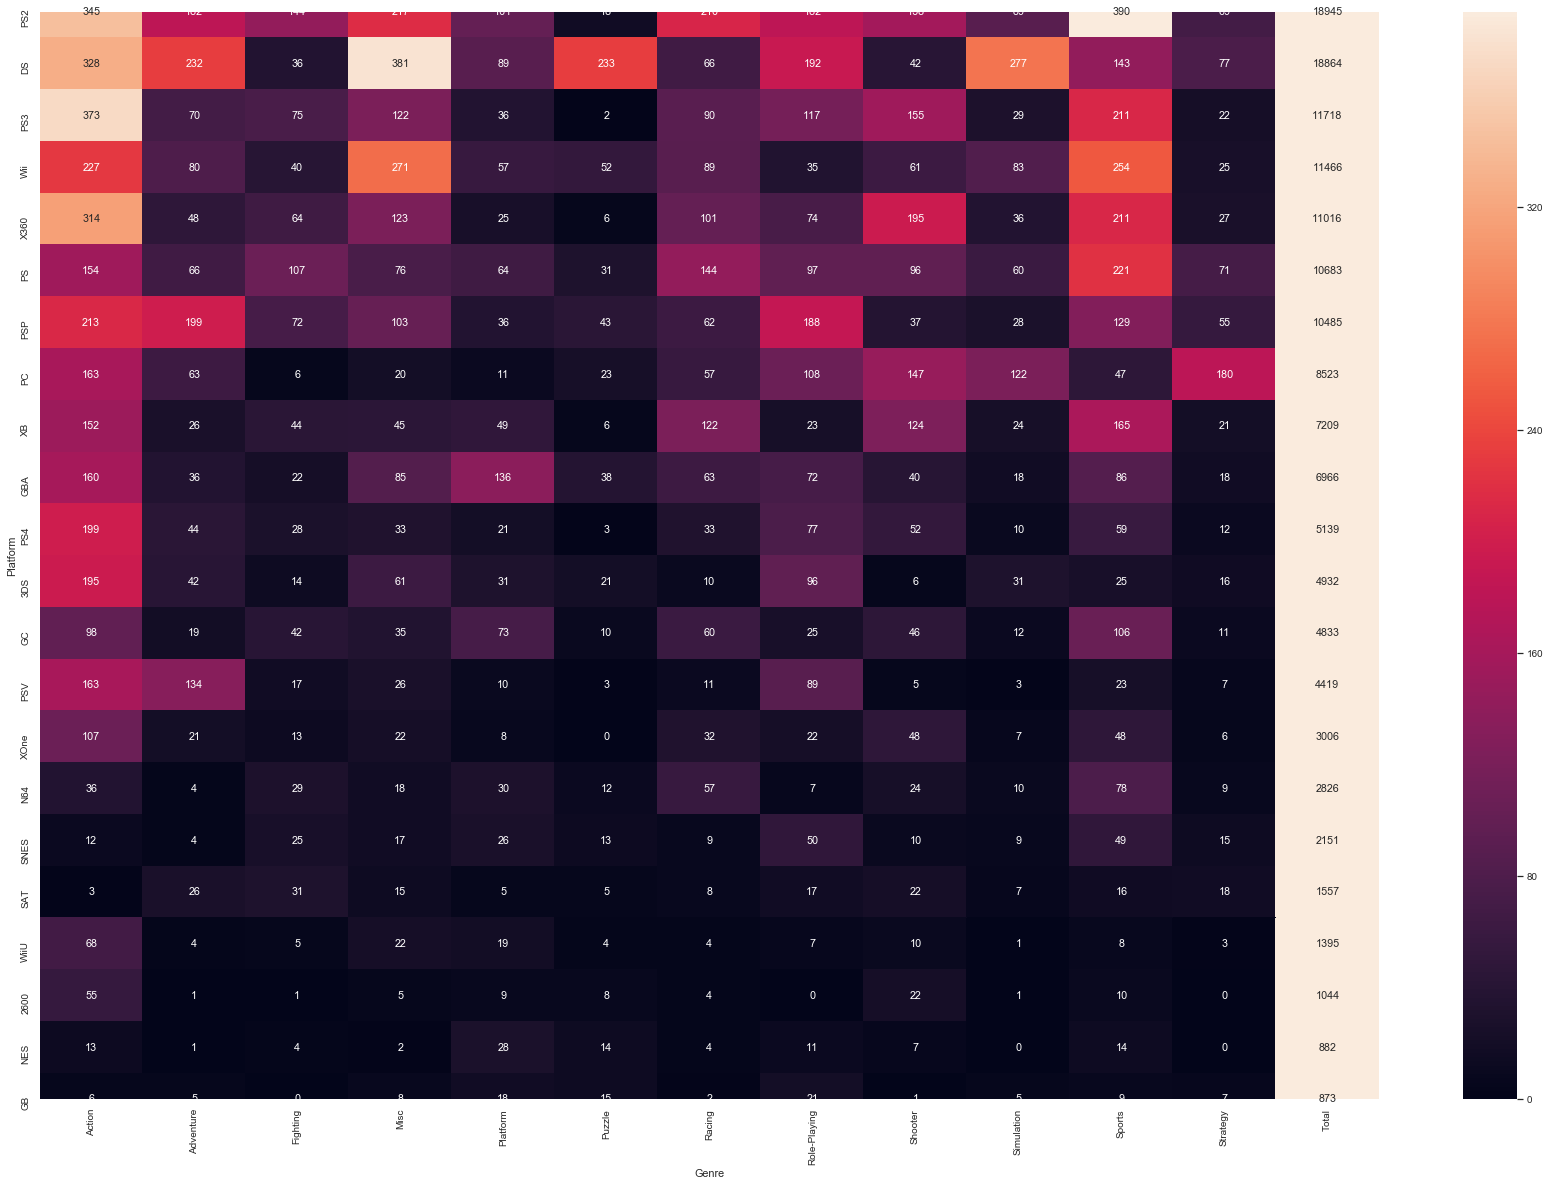

In [21]:
#Let's create a heatmap to see games by genre per platform

Platform_Genre['Total'] = Platform_Genre.sum(axis=1)
popPlatform = Platform_Genre[Platform_Genre['Total']>500].sort_values(by='Total', ascending = False)
data = popPlatform.loc[:,:'Strategy']
maximum = data.values.max()
minimum = data.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=0.9)
plt.figure(figsize=(30,20))
sns.heatmap(popPlatform, vmin = minimum, vmax = maximum, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

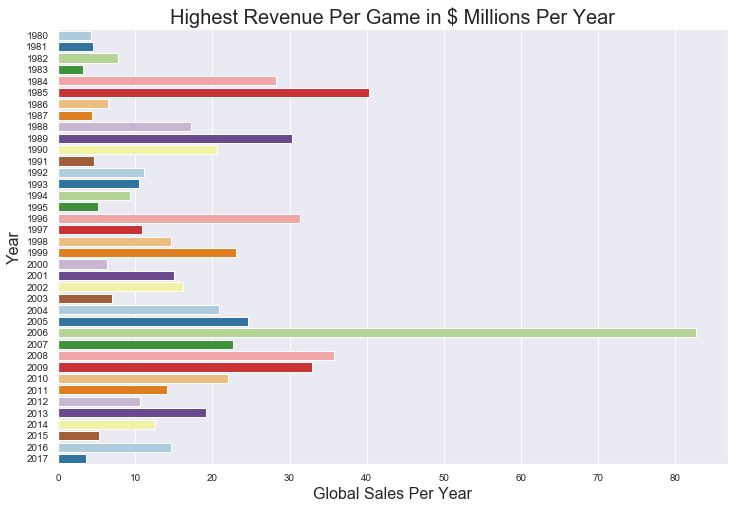

,Game,Global Sales
Year,,
1980,Asteroids,4.310
1981,Pitfall!,4.500
1982,Pac-Man,7.810
1983,Baseball,3.200
1984,Duck Hunt,28.310
1985,Super Mario Bros.,40.240
1986,The Legend of Zelda,6.510
1987,Zelda II: The Adventure of Link,4.380
1988,Super Mario Bros. 3,17.280


In [22]:
#Let's see the top selling games per year. 

table = video_games.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
vg = pd.concat([games, sales], axis=1)
vg.columns = ['Game', 'Global Sales']


colors = sns.color_palette("Paired", len(years))
plt.figure(figsize=(12,8))
ab = sns.barplot(y = years , x = 'Global Sales', data=vg, orient='h', palette=colors)
ab.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ab.set_ylabel(ylabel='Year', fontsize=16)
ab.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show()
vg

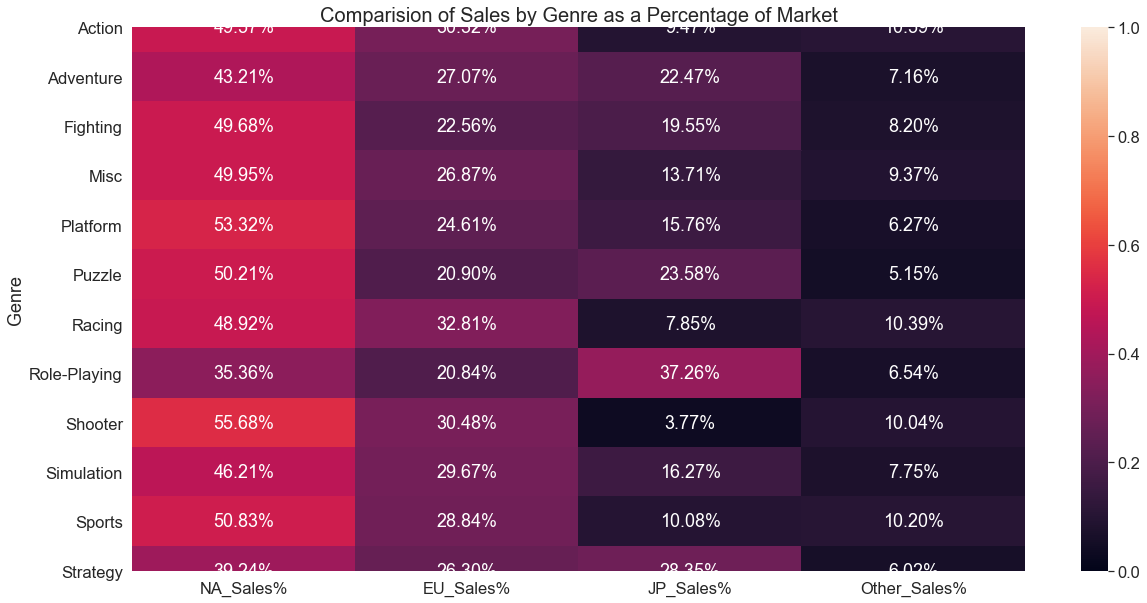

In [23]:
#I'll create a comparision of sales by genre as a percentage of market

GroupbyGenre = video_games.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GroupbyGenre['NA_Sales%'] = GroupbyGenre['NA_Sales']/GroupbyGenre['Global_Sales']
GroupbyGenre['EU_Sales%'] = GroupbyGenre['EU_Sales']/GroupbyGenre['Global_Sales']
GroupbyGenre['JP_Sales%'] = GroupbyGenre['JP_Sales']/GroupbyGenre['Global_Sales']
GroupbyGenre['Other_Sales%'] = GroupbyGenre['Other_Sales']/GroupbyGenre['Global_Sales']
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)

sns.heatmap(GroupbyGenre.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparision of Sales by Genre as a Percentage of Market", fontsize = 20)
plt.show()



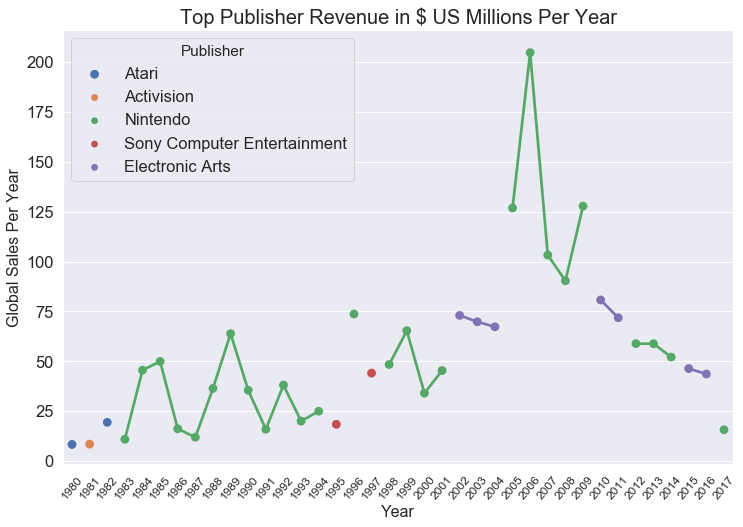

In [24]:
#What publisher ranked highest?

table2 = video_games.pivot_table('Global_Sales', index='Publisher', columns='Year', aggfunc='sum')
publishers = table2.idxmax()
sales = table2.max()
years = table2.columns.astype(int)
data = pd.concat([publishers, sales], axis=1)
data.columns = ['Publisher', 'Global Sales']

plt.figure(figsize=(12,8))
pub = sns.pointplot(y = 'Global Sales', x = years, hue='Publisher', data=data, size=15)
pub.set_xlabel(xlabel='Year', fontsize=16)
pub.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
pub.set_title(label='Top Publisher Revenue in $ US Millions Per Year', fontsize=20)
pub.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

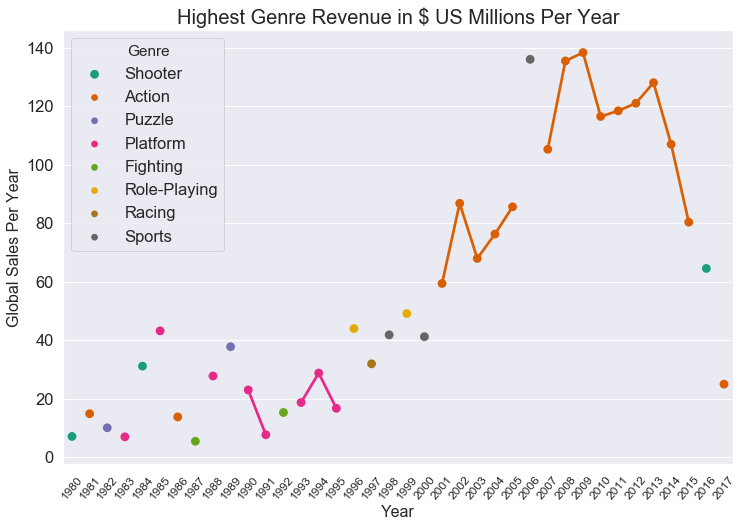

In [25]:
#Now let's see which genre topped each year
table3 = video_games.pivot_table('Global_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table3.idxmax()
sales = table3.max()
years = table3.columns.astype(int)
values = pd.concat([genres, sales], axis=1)
values.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(12,8))
ga = sns.pointplot(y = 'Global Sales', x = years, hue='Genre', data=values, size=15, palette='Dark2')
ga.set_xlabel(xlabel='Year', fontsize=16)
ga.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ga.set_title(label='Highest Genre Revenue in $ US Millions Per Year', fontsize=20)
ga.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

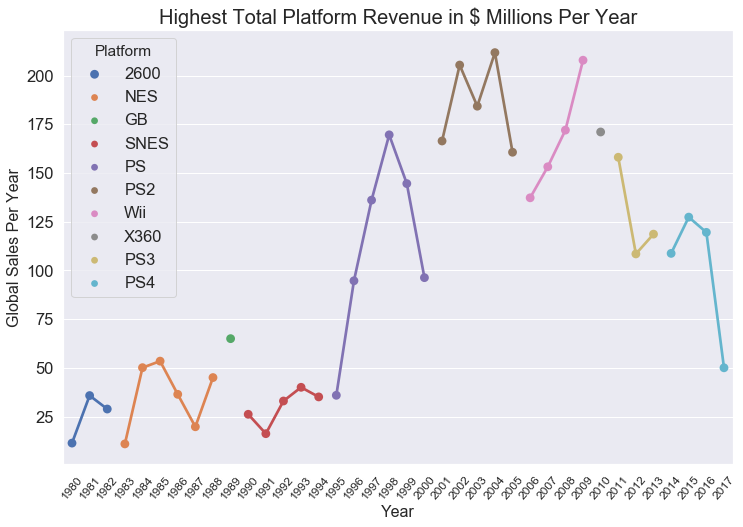

In [26]:
#Which Platform had the most revenue by year?

table4 = video_games.pivot_table('Global_Sales', index='Platform', columns='Year', aggfunc='sum')
platforms = table4.idxmax()
sales = table4.max()
years = table4.columns.astype(int)
info = pd.concat([platforms, sales], axis=1)
info.columns = ['Platform', 'Global Sales']

plt.figure(figsize=(12,8))
pa = sns.pointplot(y = 'Global Sales', x = years, hue='Platform', data=info, size=15)
pa.set_xlabel(xlabel='Year', fontsize=16)
pa.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
pa.set_title(label='Highest Total Platform Revenue in $ Millions Per Year', fontsize=20)
pa.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show()

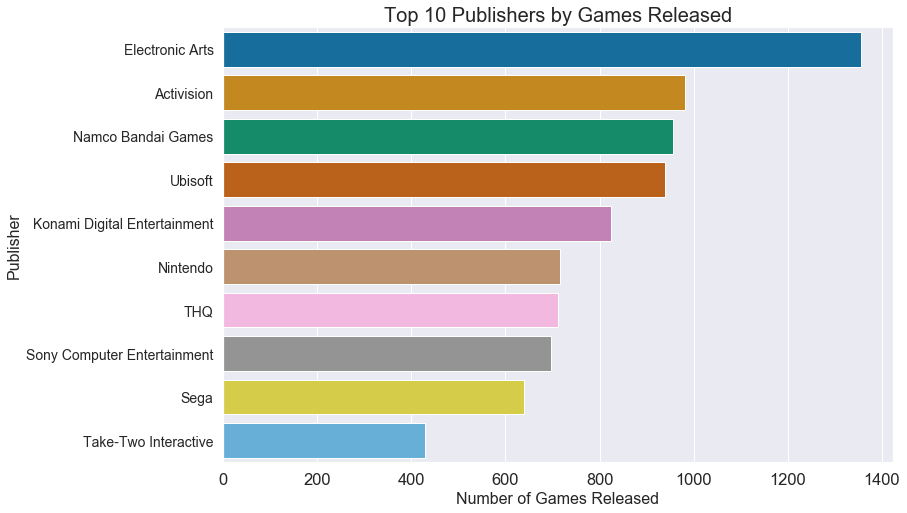

In [28]:
#Top publishers by games released

pr = video_games.groupby(['Publisher']).count().iloc[:,0]
pr = pd.DataFrame(pr.sort_values(ascending=False))[0:10]
publishers = pr.index
pr.columns = ['Releases']

colors = sns.color_palette("colorblind", len(data))
plt.figure(figsize=(12,8))
prg = sns.barplot(y = publishers , x = 'Releases', data=pr, orient='h', palette=colors)
prg.set_xlabel(xlabel='Number of Games Released', fontsize=16)
prg.set_ylabel(ylabel='Publisher', fontsize=16)
prg.set_title(label='Top 10 Publishers by Games Released', fontsize=20)
prg.set_yticklabels(labels = publishers, fontsize=14)
plt.show()

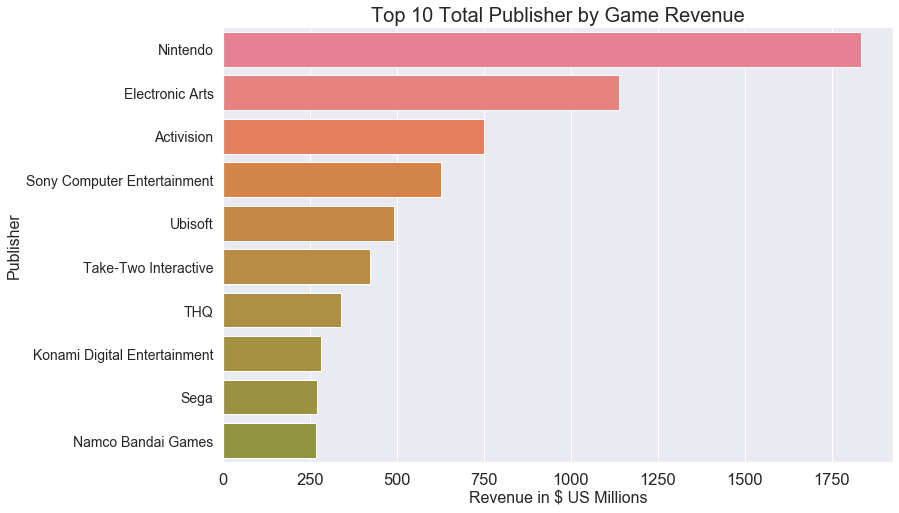

In [29]:
#Top publishers by game revenue

PGS = video_games.groupby(['Publisher']).sum()['Global_Sales']
PGS = pd.DataFrame(PGS.sort_values(ascending=False))[0:10]
publishers = PGS.index
PGS.columns = ['Global Sales']

colors = sns.color_palette("husl", len(data))
plt.figure(figsize=(12,8))
TP = sns.barplot(y = publishers , x = 'Global Sales', data=PGS, orient='h', palette=colors)
TP.set_xlabel(xlabel='Revenue in $ US Millions', fontsize=16)
TP.set_ylabel(ylabel='Publisher', fontsize=16)
TP.set_title(label='Top 10 Total Publisher by Game Revenue', fontsize=20)
TP.set_yticklabels(labels = publishers, fontsize=14)
plt.show();
